<a href="https://colab.research.google.com/github/azeem-aslam-ch/CV-2024/blob/main/yolo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!nvidia-smi

Tue Jul  9 00:08:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0              29W /  70W |    885MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [41]:
!pip install ultralytics

In [33]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Yolo9


In [45]:
# Pip install method (recommended)

!pip install ultralytics==8.2.51

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.4/78.2 GB disk)


In [46]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.4/78.2 GB disk)


In [6]:

from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Yolo9

/content/drive/MyDrive/Yolo9


In [9]:
!ls

yolo9.ipynb


In [11]:
%cd /content/drive/MyDrive/Yolo9

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=416 plots=True

/content/drive/MyDrive/Yolo9
100% 21.5M/21.5M [00:00<00:00, 203MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

In [12]:
!ls runs/detect/train

args.yaml					    results.csv		train_batch407.jpg
confusion_matrix.png				    results.png		val_batch0_labels.jpg
events.out.tfevents.1720479065.2530bf8d3320.7382.0  train_batch0.jpg	val_batch0_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch1_labels.jpg
P_curve.png					    train_batch2.jpg	val_batch1_pred.jpg
PR_curve.png					    train_batch405.jpg	weights
R_curve.png					    train_batch406.jpg


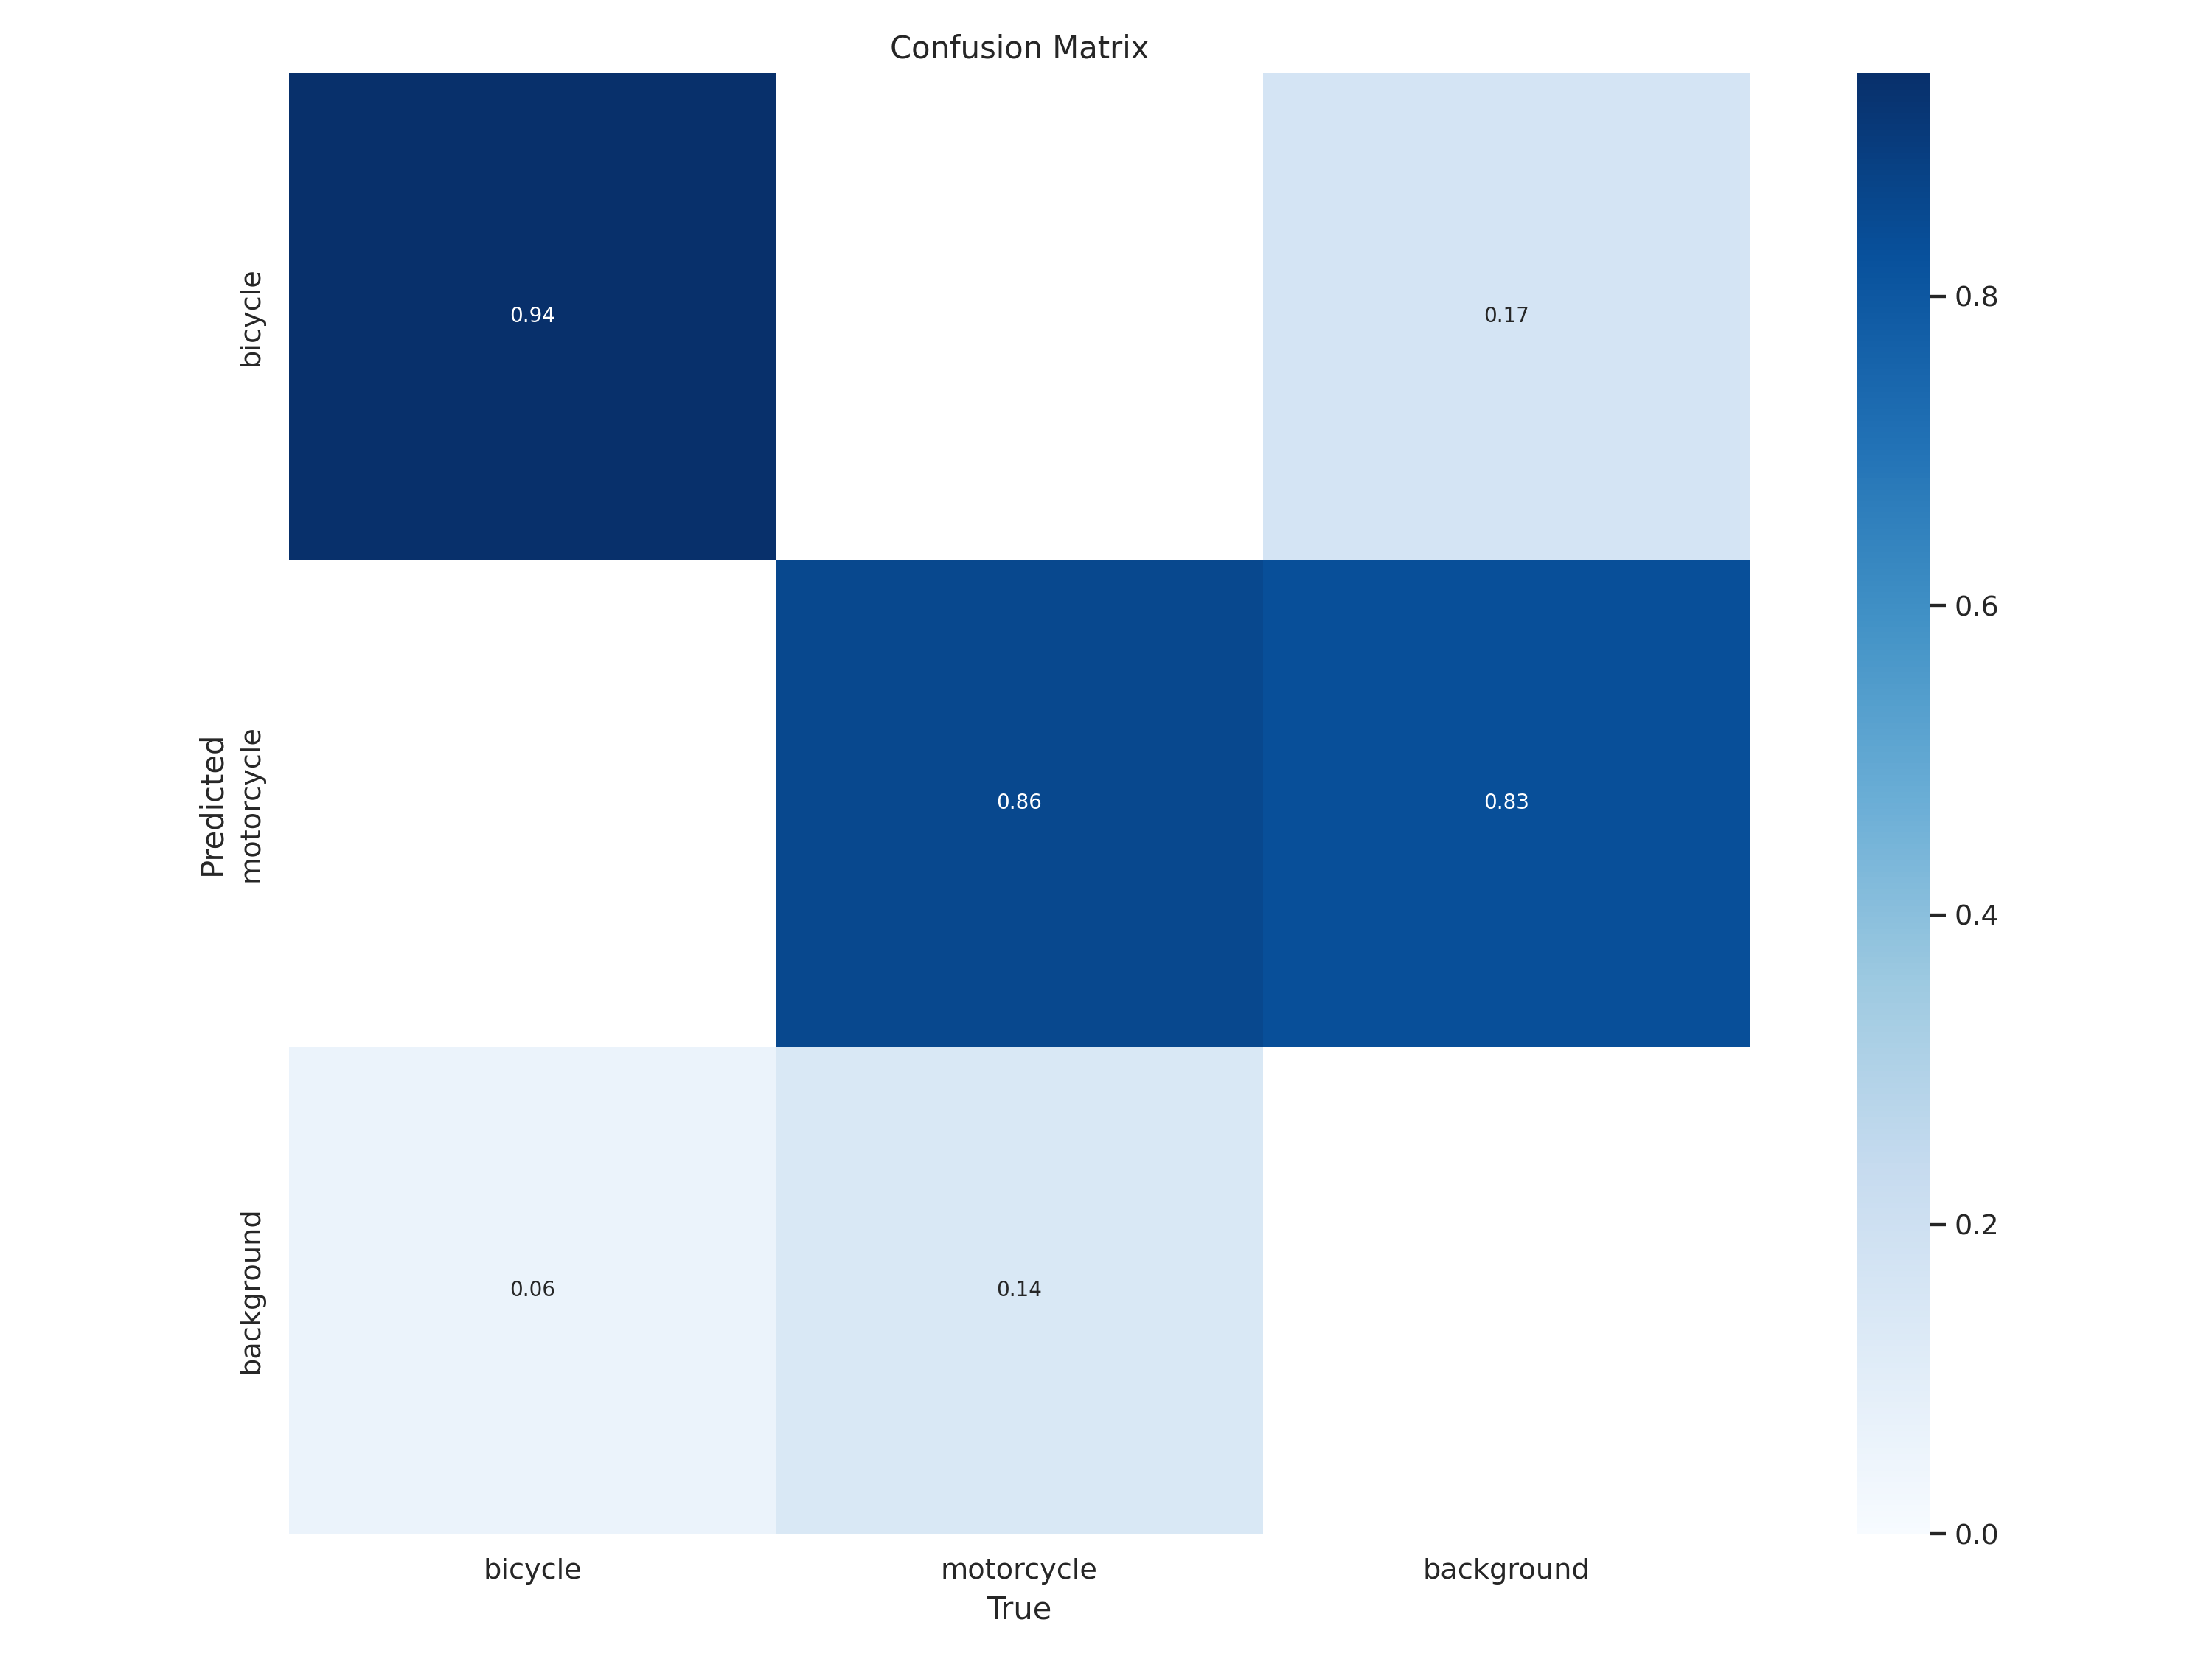

In [14]:
Image(filename='runs/detect/train/confusion_matrix.png', width=1000)

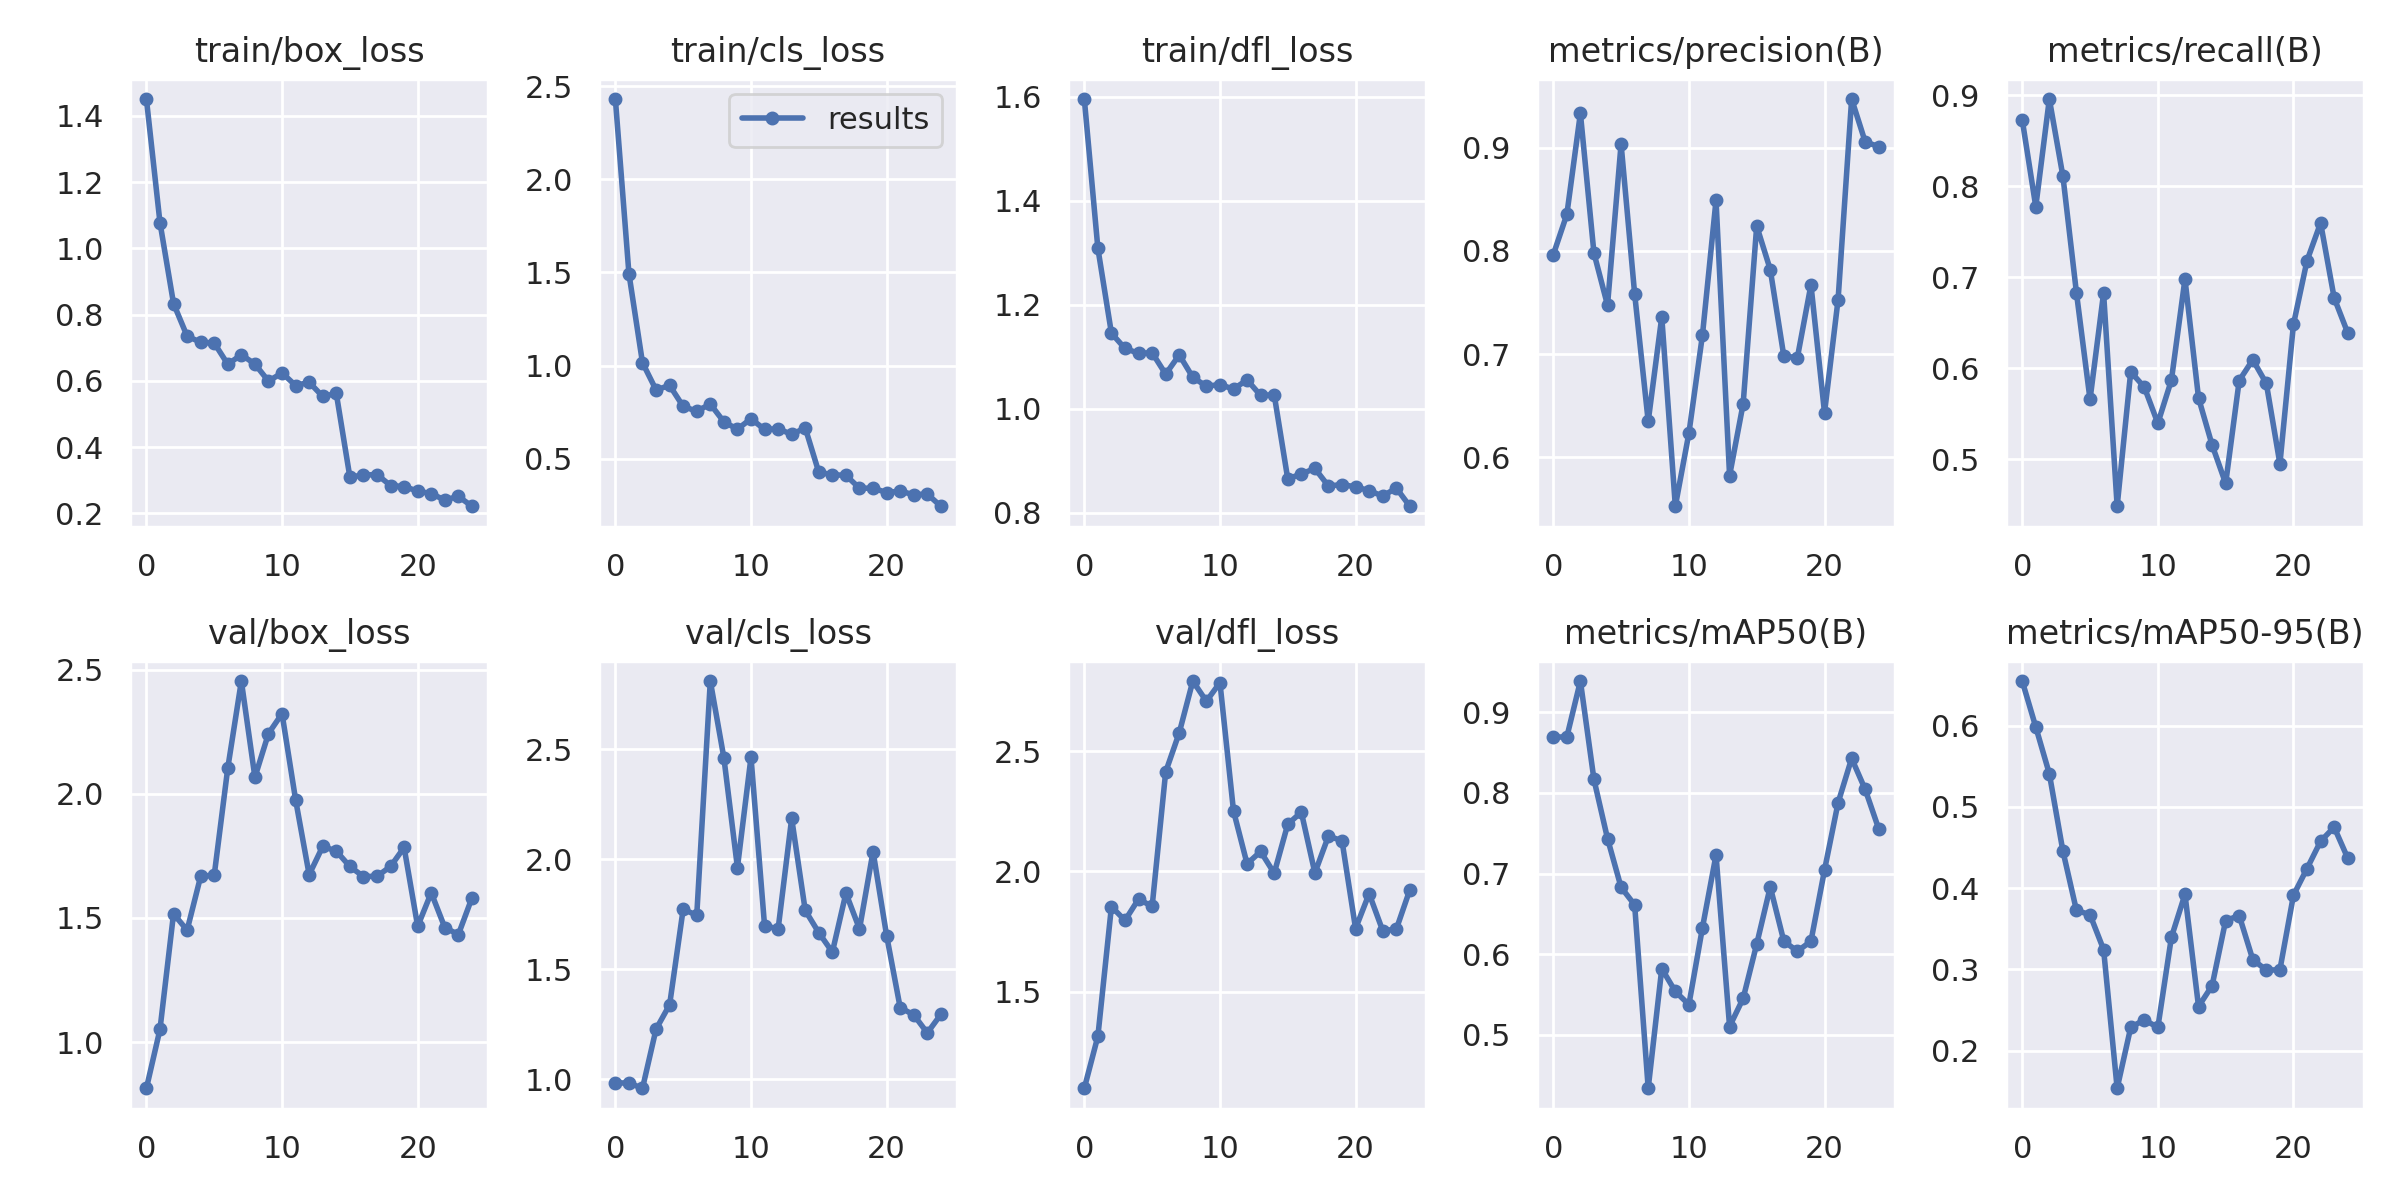

In [15]:
Image(filename='runs/detect/train/results.png', width=1000)

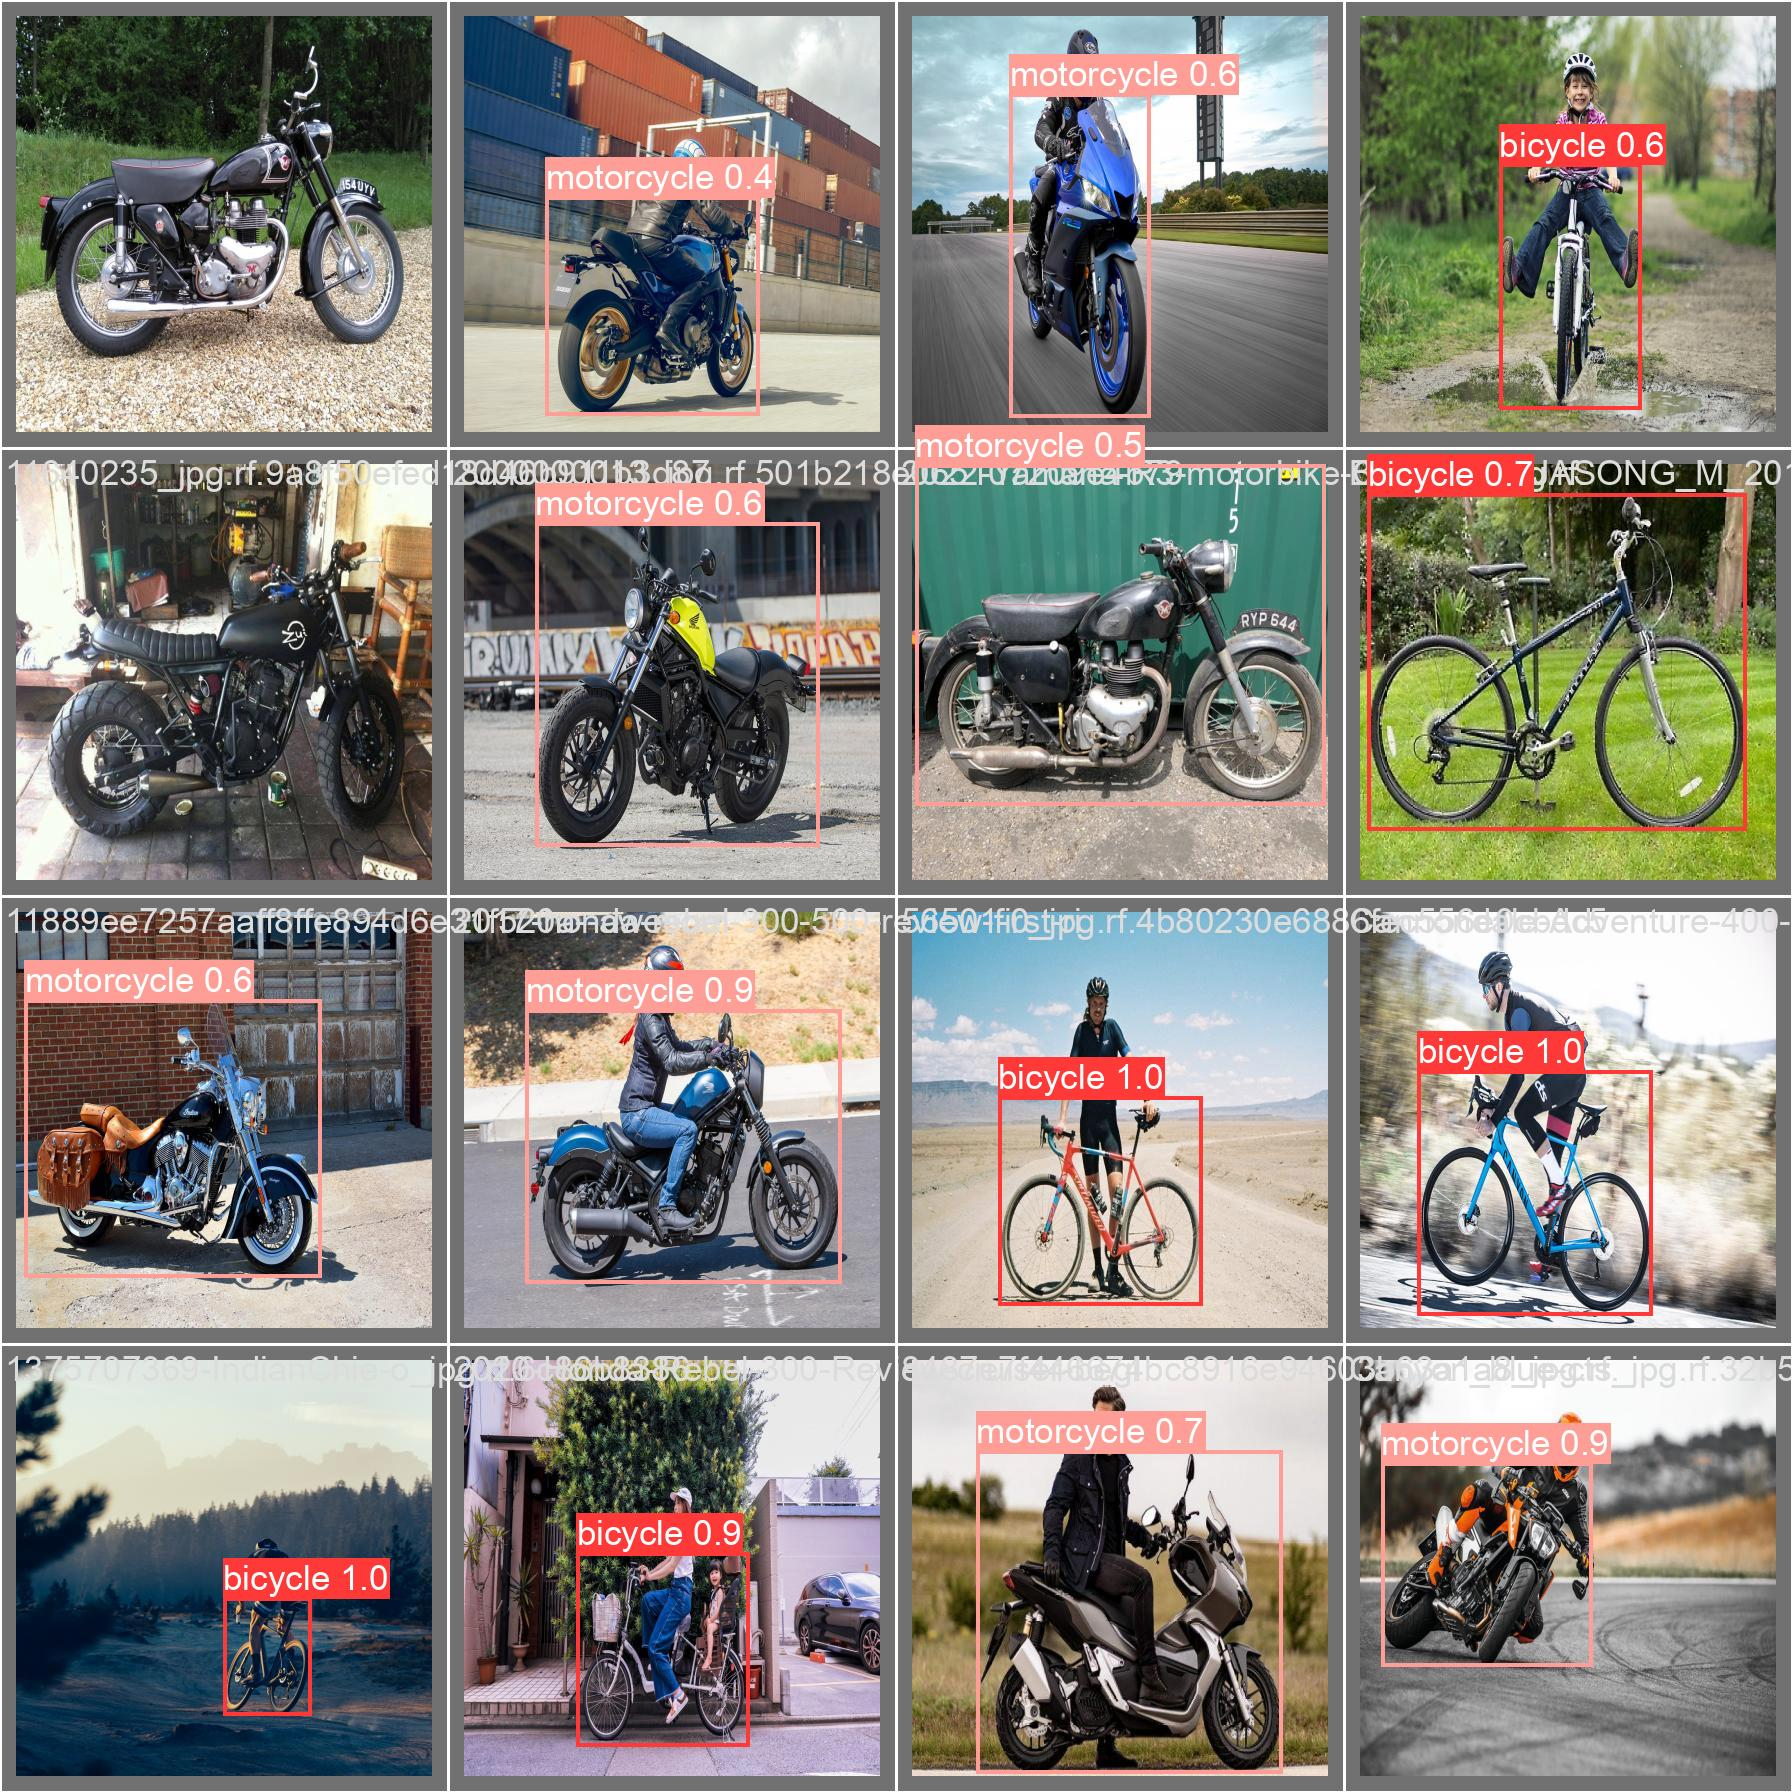

In [18]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=1000)

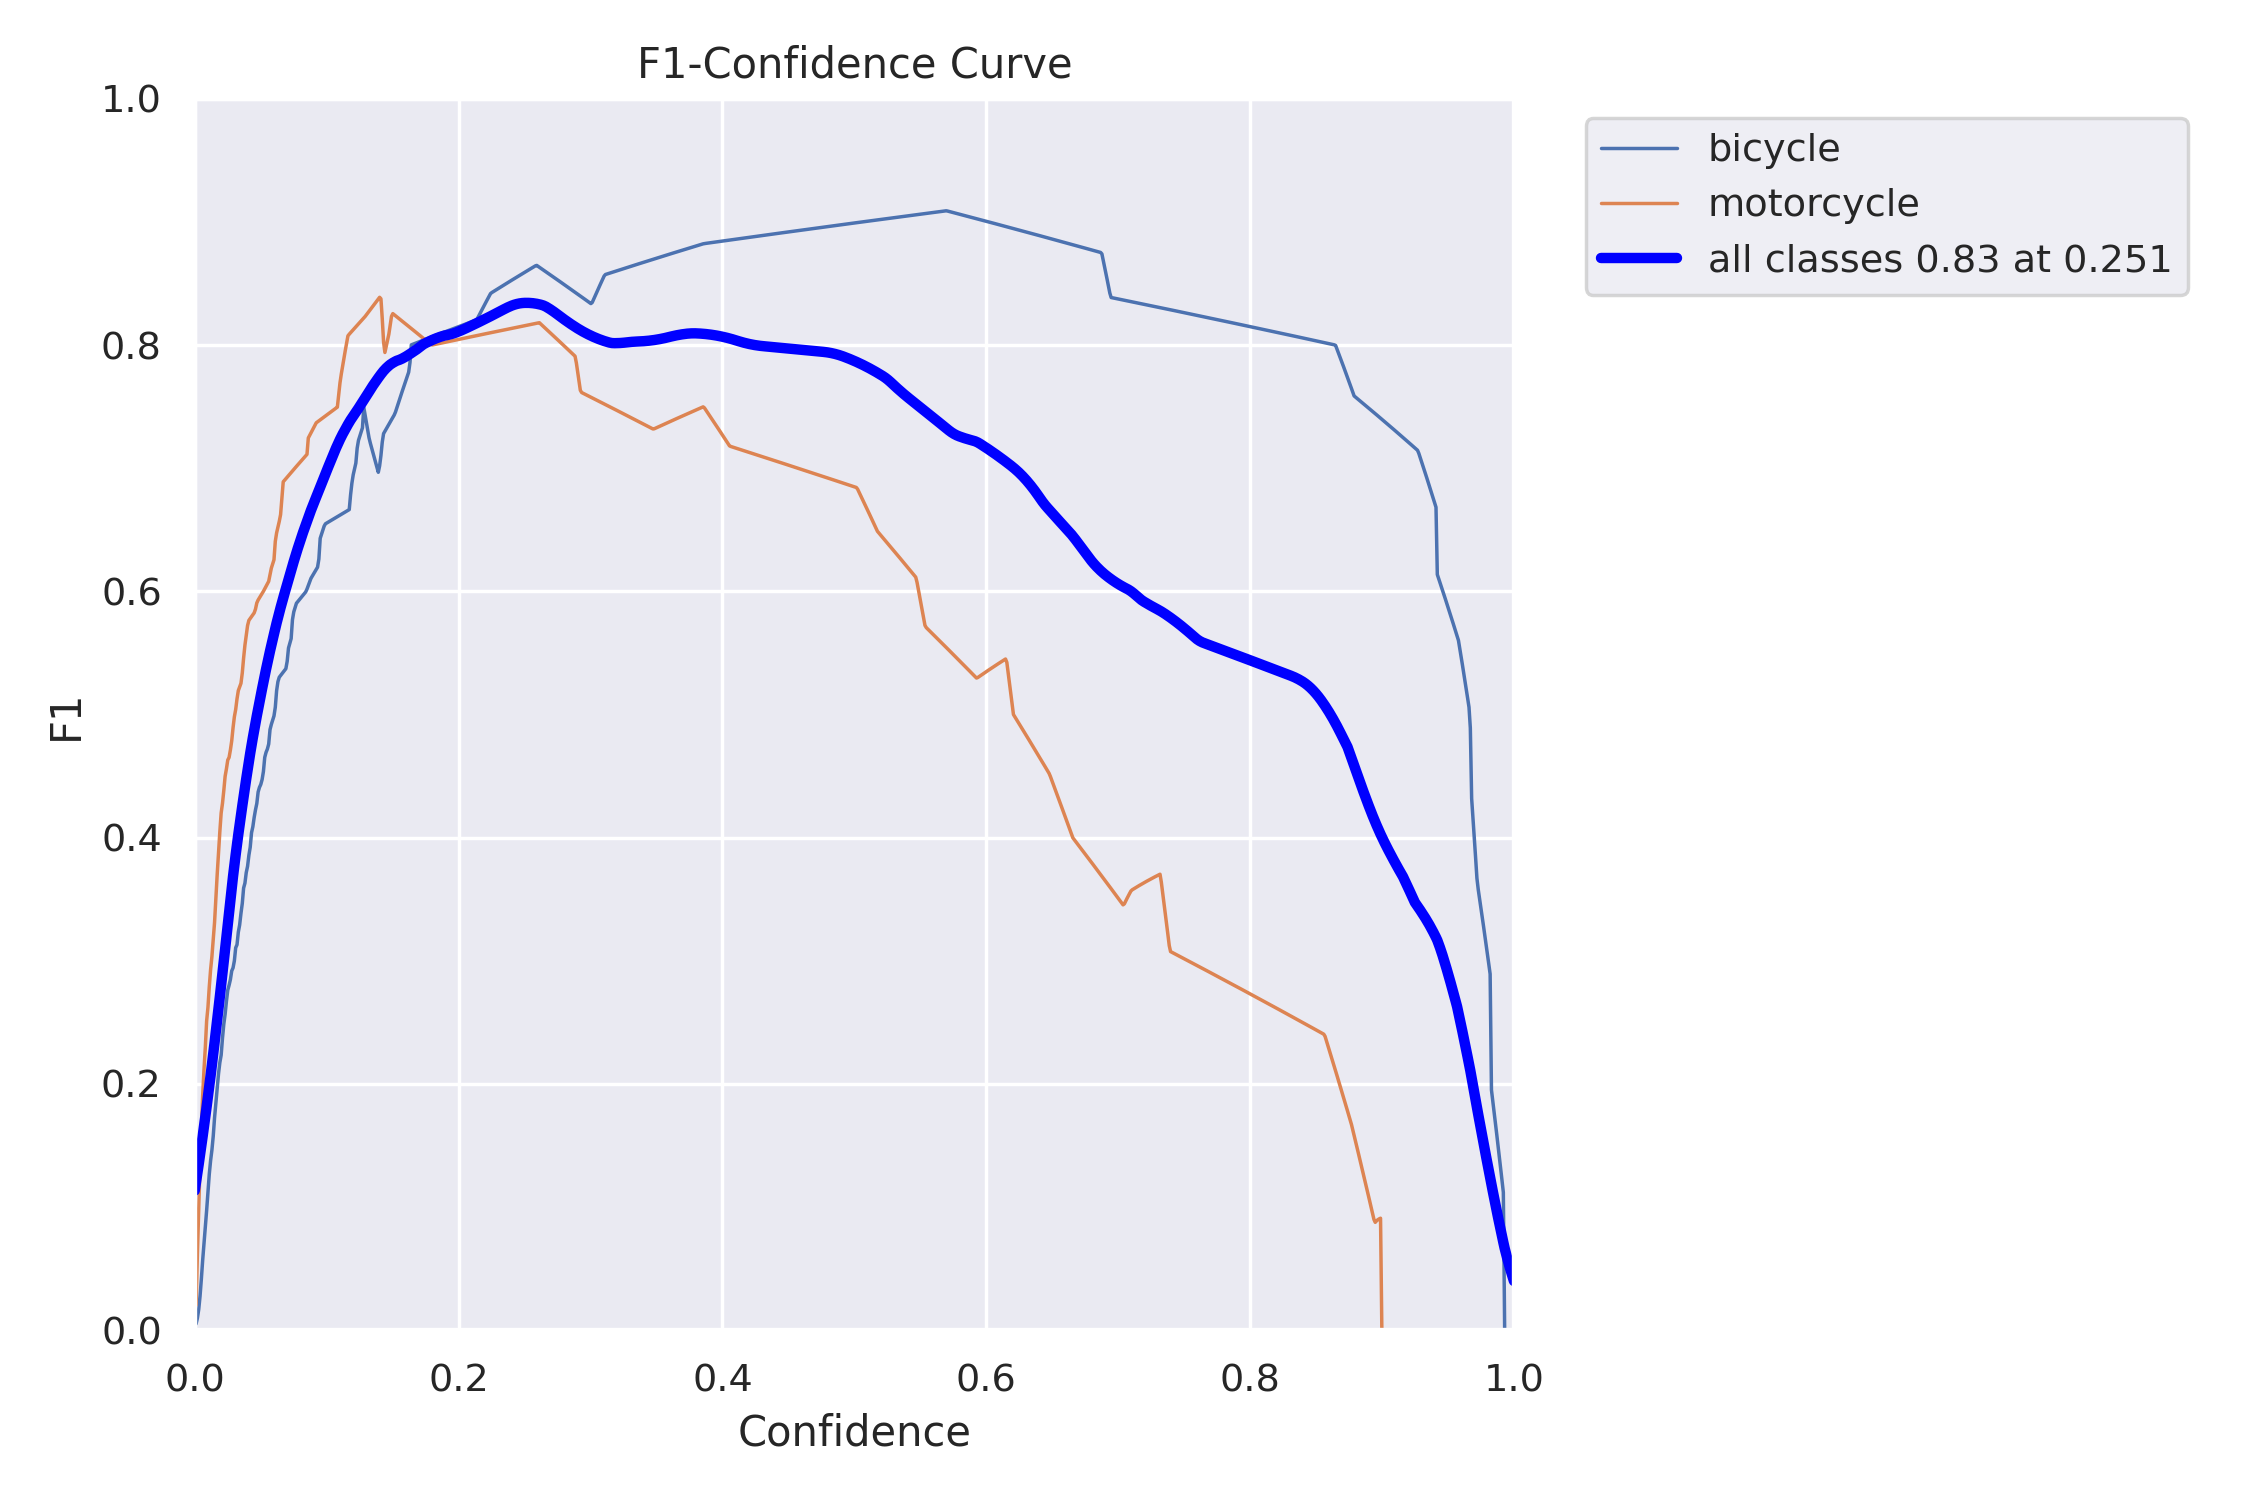

In [17]:
Image(filename='runs/detect/train/F1_curve.png', width=1200)

In [20]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolov8s.pt")

# Validate the model
metrics = model.val(data="data.yaml", imgsz=416, batch=16, conf=0.25, iou=0.6, device="0")

# # Print the accuracy metrics
# print("mAP50-95:", metrics.box.map)
# print("mAP50:", metrics.box.map50)
# print("mAP75:", metrics.box.map75)
# print("mAPs:", metrics.box.maps)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo9/WSP_DATA/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]
                   all         38         39     0.0397     0.0516     0.0448     0.0123
                person         38         18      0.032     0.0556     0.0674     0.0135
      

In [21]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=416 batch=16 lr0=0.01 momentum=0.9 weight_decay=0.0001 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [22]:
!ls runs/detect/train2

args.yaml					     results.csv	  train_batch2.jpg
confusion_matrix.png				     results.png	  val_batch0_labels.jpg
events.out.tfevents.1720482206.2530bf8d3320.22005.0  train_batch0.jpg	  val_batch0_pred.jpg
F1_curve.png					     train_batch1080.jpg  val_batch1_labels.jpg
P_curve.png					     train_batch1081.jpg  val_batch1_pred.jpg
PR_curve.png					     train_batch1082.jpg  weights
R_curve.png					     train_batch1.jpg


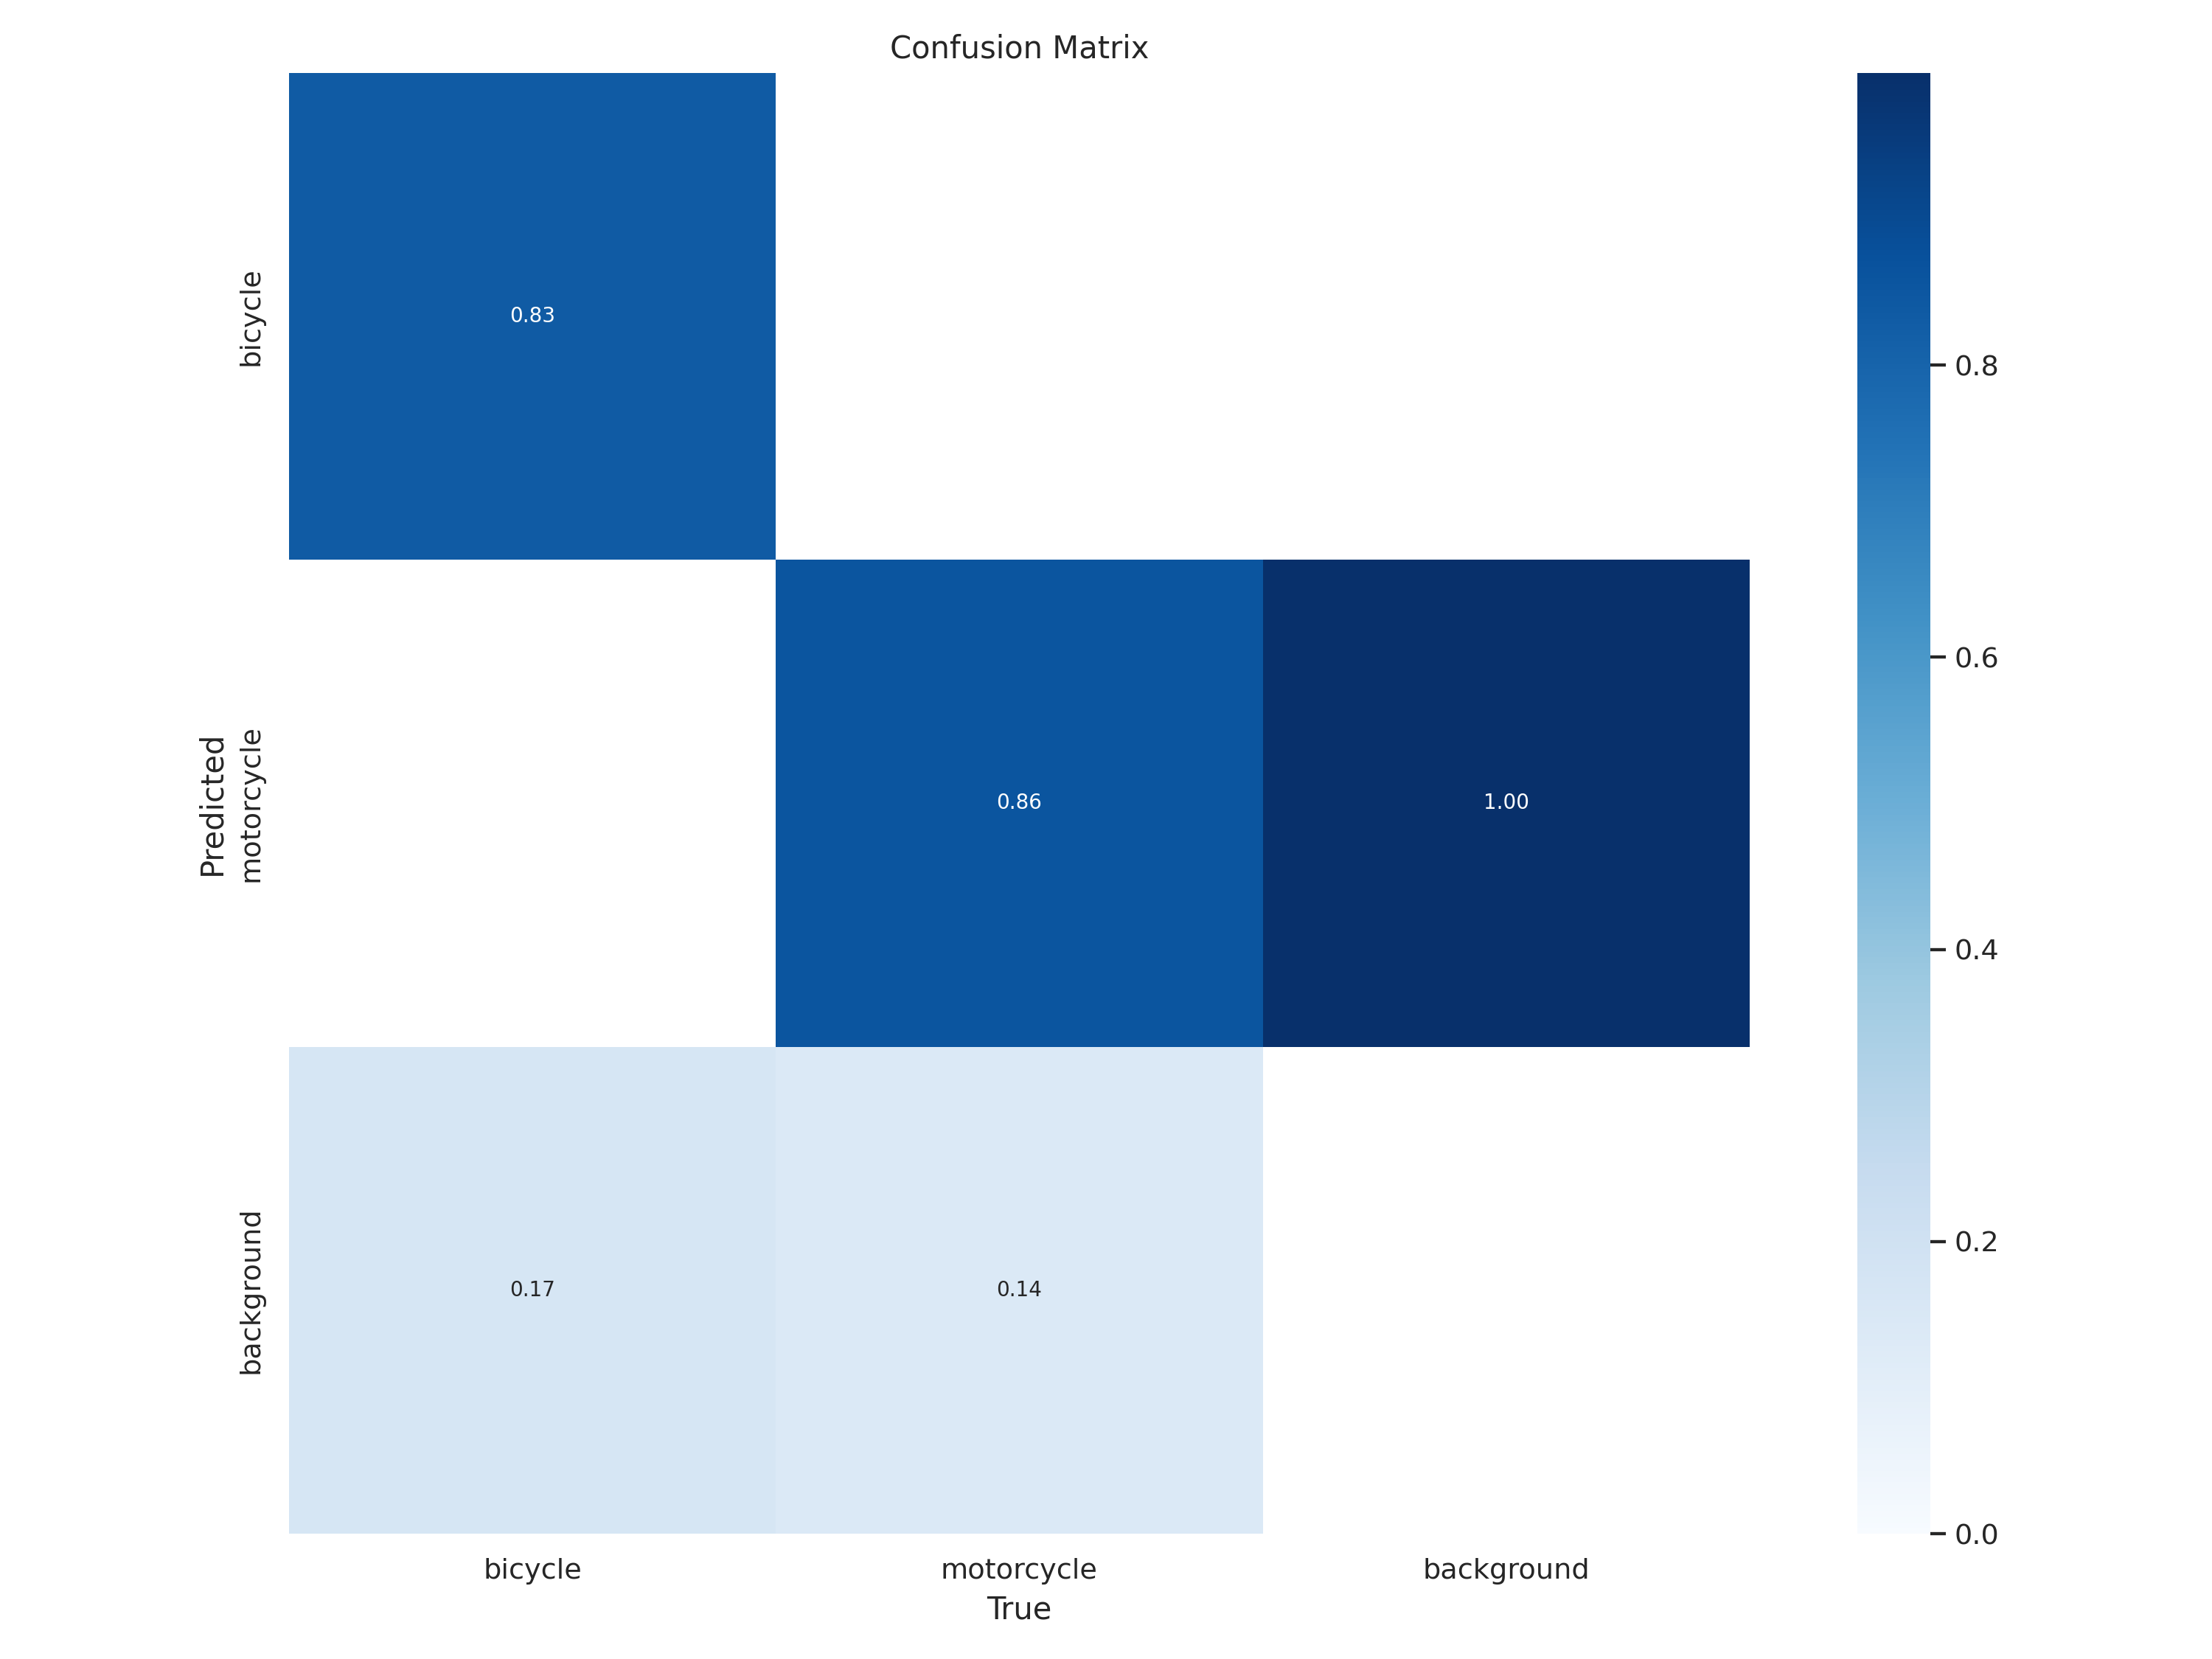

In [23]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=1000)

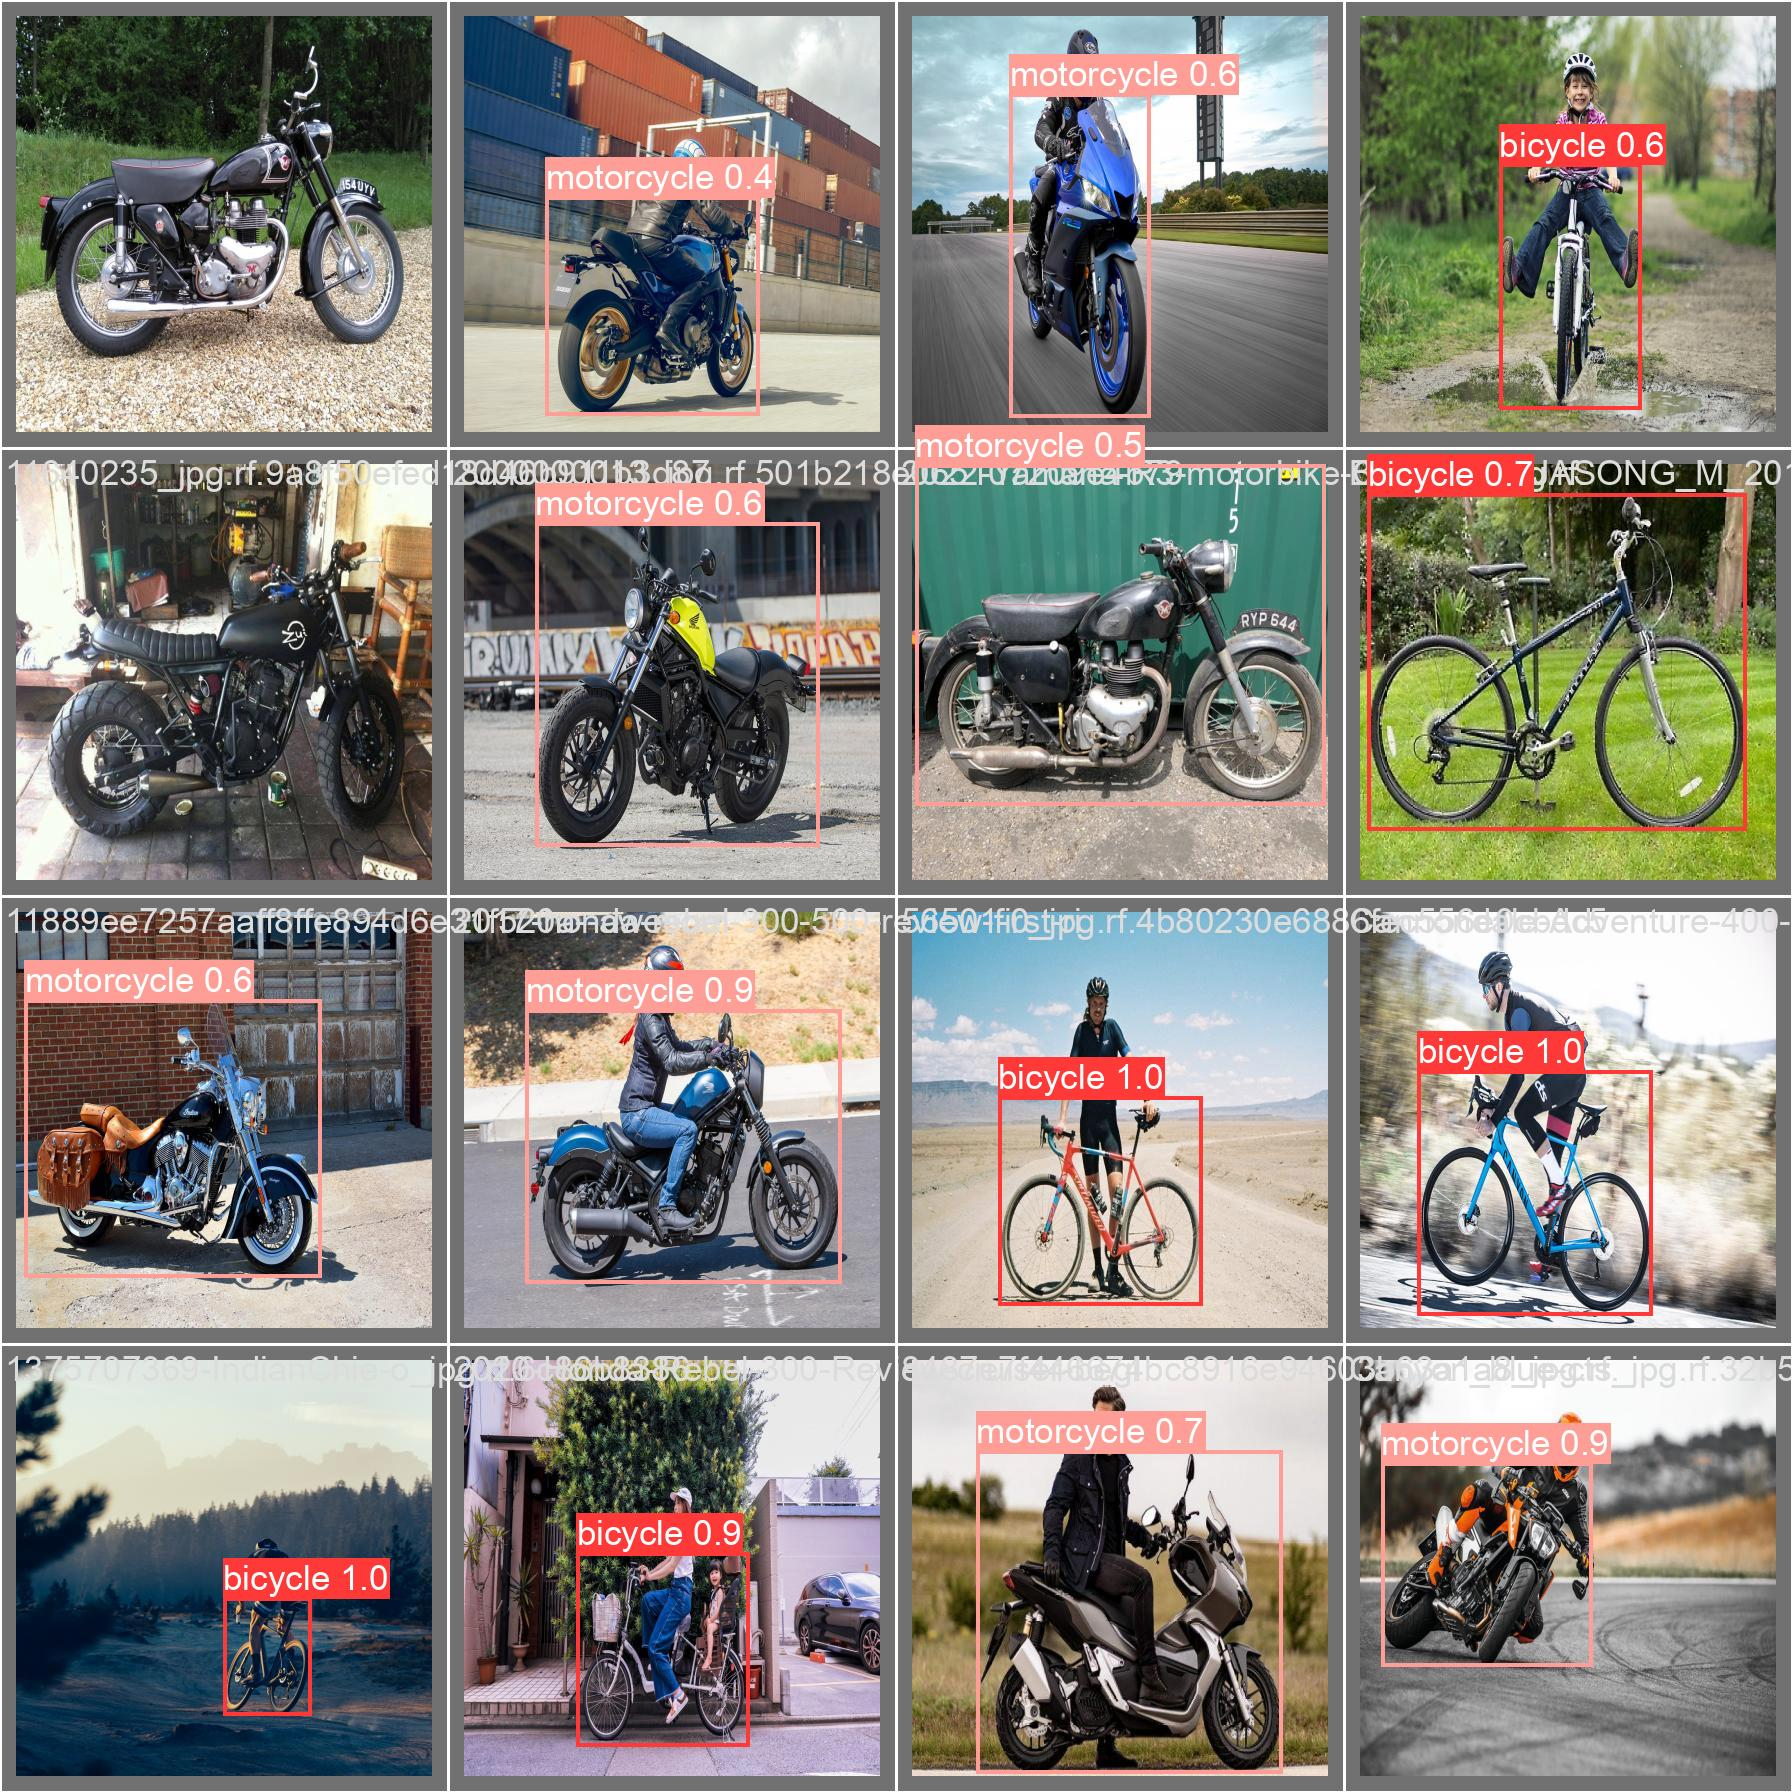

In [24]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=1000)

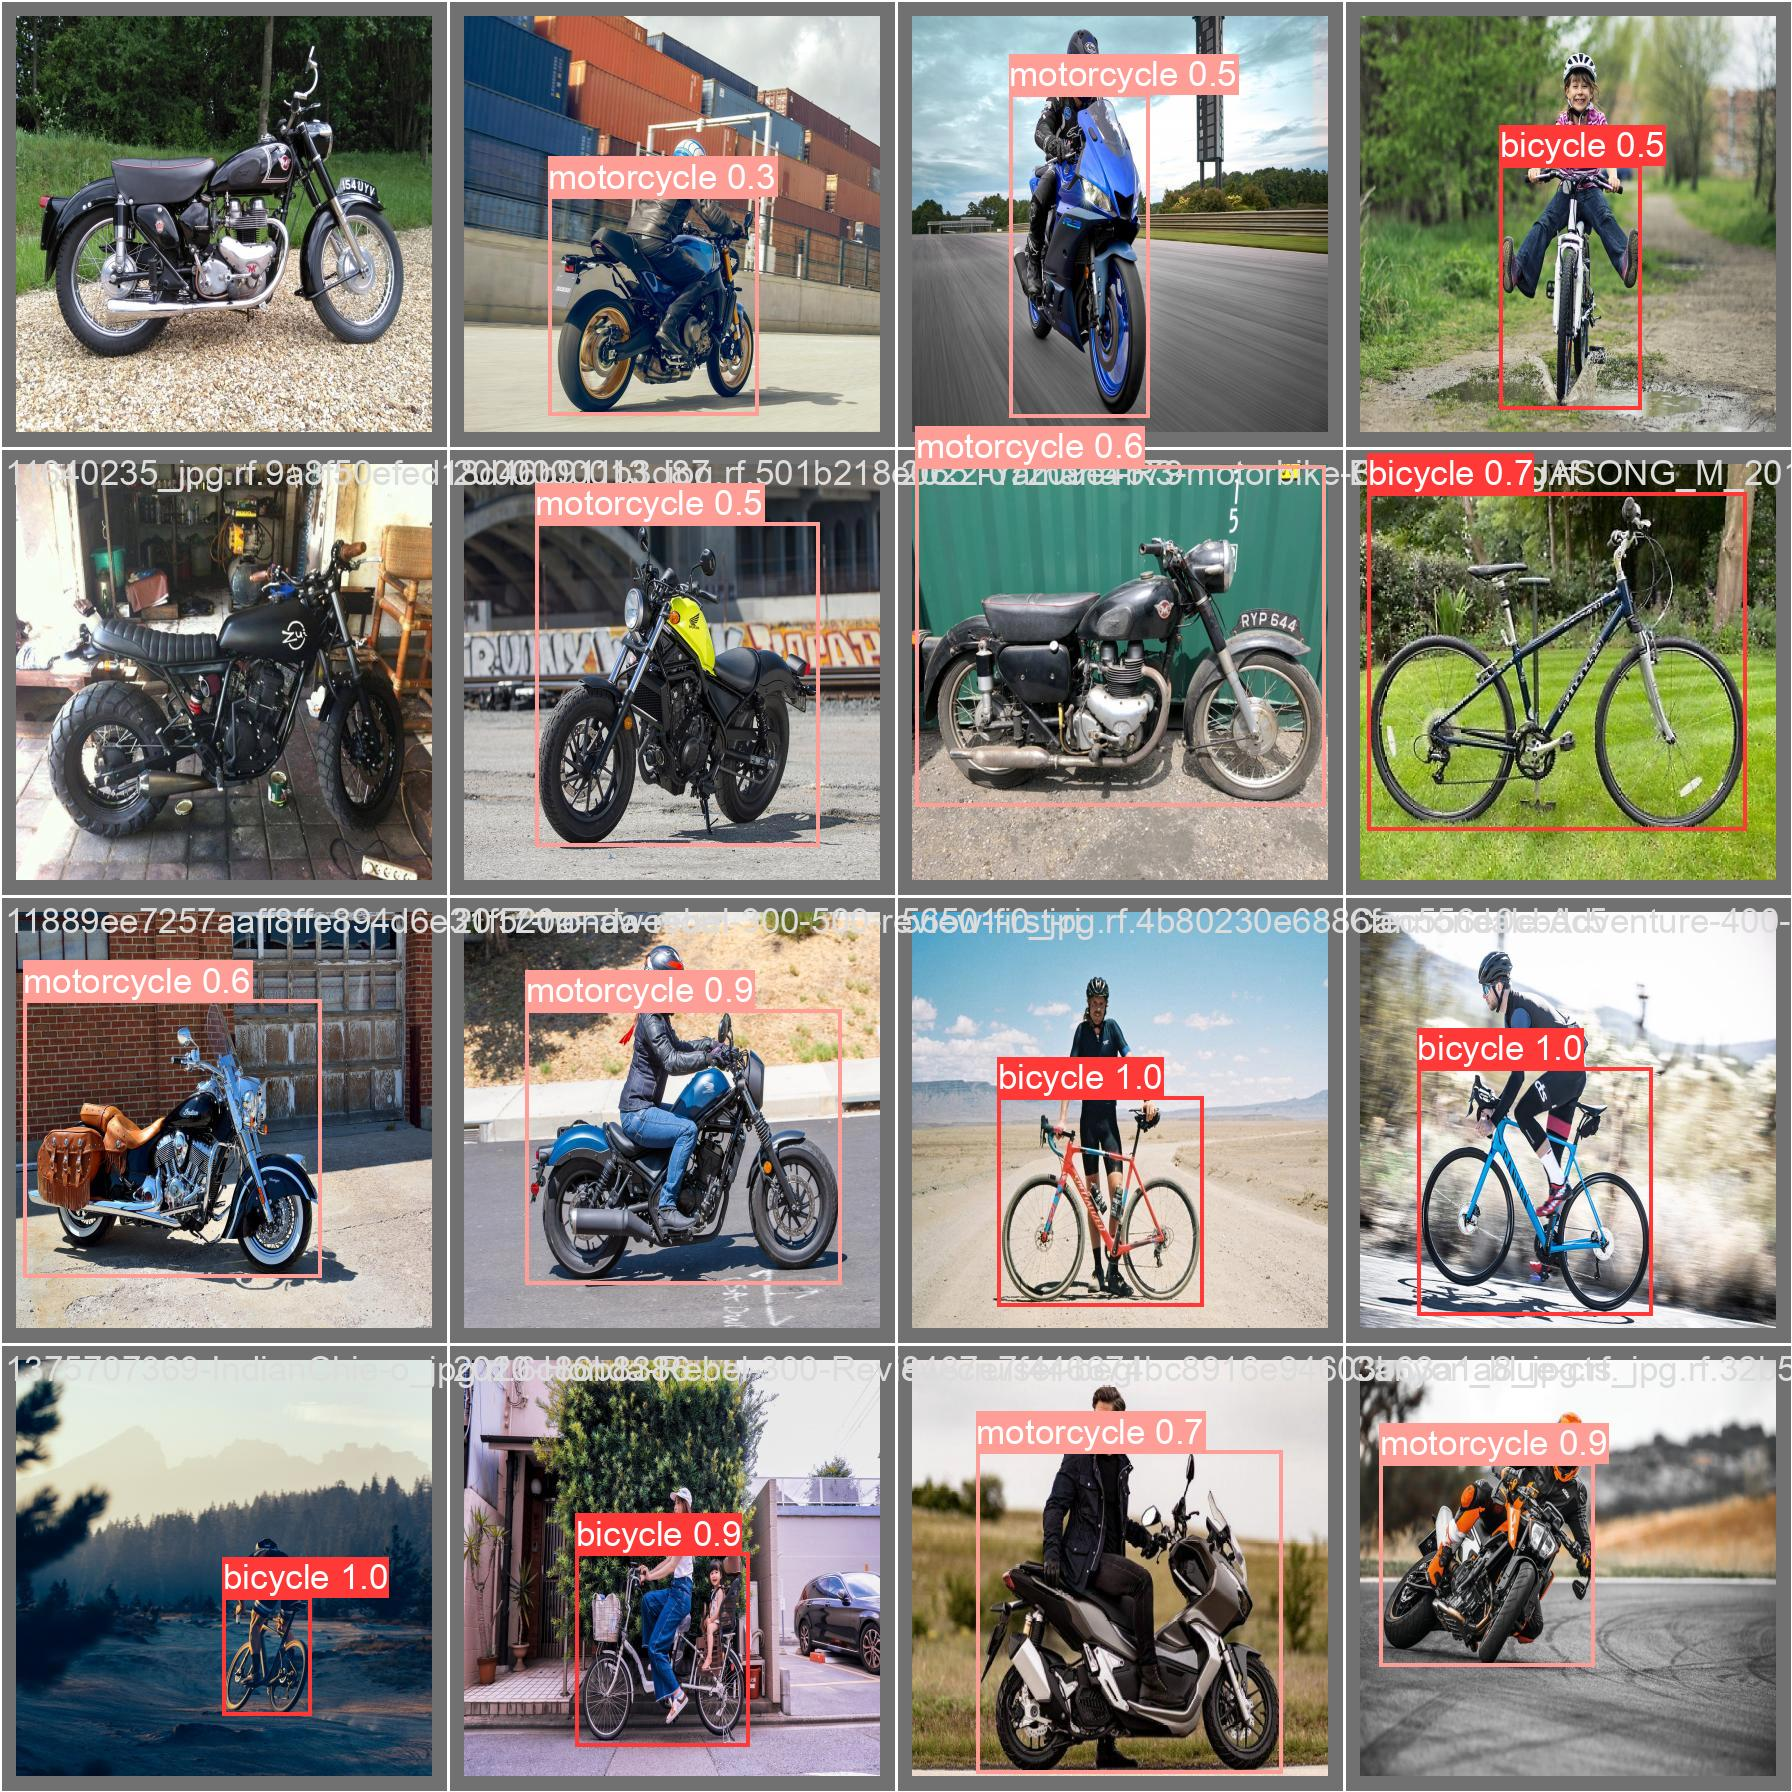

In [25]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=1000)

In [47]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo9/WSP_DATA/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<00:00, 128.92it/s]
val: New cache created: /content/drive/MyDrive/Yolo9/WSP_DATA/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.24it/s]
                   all         38         39      0.876      0.826      0.867   

In [48]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo9/WSP_DATA/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.12s/it]
                   all         38         39      0.796      0.873      0.869      0.655
               bicycle         18         18       0.82      0.889      0.943      0.693
            motorcycle         20         21      0.773      0.857      0.795      0.617
Speed: 1.5ms preprocess, 32.2ms inference, 0.0ms loss, 31.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [50]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Yolo9/WSP_DATA/test/images

Ultralytics YOLOv8.2.51 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/21 /content/drive/MyDrive/Yolo9/WSP_DATA/test/images/00nyvirus-motorcycles-3-mobileMasterAt3x_jpg.rf.59924f6e06c03dcd0e32c38d159f18cd.jpg: 416x416 4 motorcycles, 10.0ms
image 2/21 /content/drive/MyDrive/Yolo9/WSP_DATA/test/images/100753882_836672400434422_8033746016614219776_n-1_jpg.rf.9e3f12db509f89554929d1f6dbe81113.jpg: 416x416 1 bicycle, 10.4ms
image 3/21 /content/drive/MyDrive/Yolo9/WSP_DATA/test/images/1400762614840-lzpu5wuc6xso-146c928_jpg.rf.d5ab954821ca2772841147b8f62542c5.jpg: 416x416 1 bicycle, 10.9ms
image 4/21 /content/drive/MyDrive/Yolo9/WSP_DATA/test/images/2020-Honda-Rebel-300-Review-cruiser-beginner-motorcycle-5_jpg.rf.1483f3dc690ffdb6f678ae039d776ad6.jpg: 416x416 1 motorcycle, 10.0ms
image 5/21 /content/drive/MyDrive/Yolo9/WSP_DATA/test/images/2022-Honda-CBR150R-Revealed-Features-Fireblade-Insp